# ***Cleaning Data***

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
airbnb_data = pd.read_csv('/content/AB_NYC_2019.csv')
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
## Define file paths
file_paths = ["/content/GBvideos.csv", "/content/RUvideos.csv", "/content/USvideos.csv", "/content/INvideos.csv",
              "/content/MXvideos.csv", "/content/FRvideos.csv", "/content/DEvideos.csv", "/content/KRvideos.csv"]

# Initialize an empty list for cleaned data
cleaned_dataframes = []

for file_path in file_paths:
    try:
        # Load dataset
        df = pd.read_csv(file_path, encoding="ISO-8859-1")

        # Remove duplicate rows
        df.drop_duplicates(inplace=True)

        # Handle missing values
        df.fillna(method='ffill', inplace=True)  # Forward fill missing values

        # Standardization - Convert column names to lowercase
        df.columns = df.columns.str.lower()

        # Detect & Remove Outliers (Using Z-score method)
        numerical_cols = df.select_dtypes(include=['number']).columns
        df = df[(np.abs(stats.zscore(df[numerical_cols])) < 3).all(axis=1)]

        cleaned_dataframes.append(df)
        print(f"Successfully cleaned {file_path}")

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Optionally, merge all cleaned data
youtube_data = pd.concat(cleaned_dataframes, ignore_index=True)
print("Final cleaned dataset shape:", youtube_data.shape)



<ipython-input-22-5b970af0806e>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


Successfully cleaned /content/GBvideos.csv


<ipython-input-22-5b970af0806e>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


Successfully cleaned /content/RUvideos.csv


<ipython-input-22-5b970af0806e>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


Successfully cleaned /content/USvideos.csv


<ipython-input-22-5b970af0806e>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


Successfully cleaned /content/INvideos.csv


<ipython-input-22-5b970af0806e>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


Successfully cleaned /content/MXvideos.csv


<ipython-input-22-5b970af0806e>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


Successfully cleaned /content/FRvideos.csv
Error processing /content/DEvideos.csv: Error tokenizing data. C error: EOF inside string starting at row 8190
Successfully cleaned /content/KRvideos.csv
Final cleaned dataset shape: (256250, 16)


<ipython-input-22-5b970af0806e>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


In [ ]:
#data integrity check
print("Airbnb Dataset Info:")
print(airbnb_data.info())

print("Youtube Dataset Info:")
print(youtube_data.info())

Airbnb Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 38843 entries, 0 to 48852
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38843 non-null  int64  
 1   name                            38837 non-null  object 
 2   host_id                         38843 non-null  int64  
 3   host_name                       38827 non-null  object 
 4   neighbourhood_group             38843 non-null  object 
 5   neighbourhood                   38843 non-null  object 
 6   latitude                        38843 non-null  float64
 7   longitude                       38843 non-null  float64
 8   room_type                       38843 non-null  object 
 9   price                           38843 non-null  int64  
 10  minimum_nights                  38843 non-null  int64  
 11  number_of_reviews               38843 non-null  int64  
 12  last_review     

In [ ]:
#missing data handling
#check for missing data in Airbnb dataset
missing_airbnb = airbnb_data.isnull().sum()
print("Missing Data in Airbnb Dataset:",missing_airbnb)

#print the columns of the Airbnb dataframe to verify the names
print("Columns in Airbnb dataframe:\n",airbnb_data.columns)

#fill missing values or drop rows/columns based on the context
airbnb_data['last_review'] = airbnb_data['last_review'].fillna(airbnb_data['last_review'].mode()[0]) #filling with mode

#drop 'review_per_month' if it exists; ignore if not found
airbnb_data.drop('reviews_per_month', axis=1, inplace=True, errors='ignore') #drop if too many missing

#check for missing data in youtube dataset
missing_youtube = youtube_data.isnull().sum()
print("Missing Data in Youtube Dataset:",missing_youtube)

#print the columns of the Youtube dataframe to verify the names
youtube_data['description'] = youtube_data['description'].fillna('No description')

Missing Data in Airbnb Dataset: id                                 0
name                               6
host_id                            0
host_name                         16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
calculated_host_listings_count     0
availability_365                   0
dtype: int64
Columns in Airbnb dataframe:
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
Missing Data in Youtube Dataset: video_id                  0
trending_date            

In [ ]:
#duplicate removal
duplicates_airbnb = airbnb_data.duplicated().sum()
print("\nDuplicated rows in Airbnb Dataset:",duplicates_airbnb)
airbnb_data.drop_duplicates(inplace=True)

duplicates_youtube = youtube_data.duplicated().sum()
print("Duplicated rows in Youtube Dataset:",duplicates_youtube)
youtube_data.drop_duplicates(inplace=True)


Duplicated rows in Airbnb Dataset: 0
Duplicated rows in Youtube Dataset: 6513


In [ ]:
#standardization
#standardize column names for consistency
airbnb_data.columns = airbnb_data.columns.str.lower().str.replace(' ','-')
youtube_data.columns = youtube_data.columns.str.lower().str.replace(' ','-')

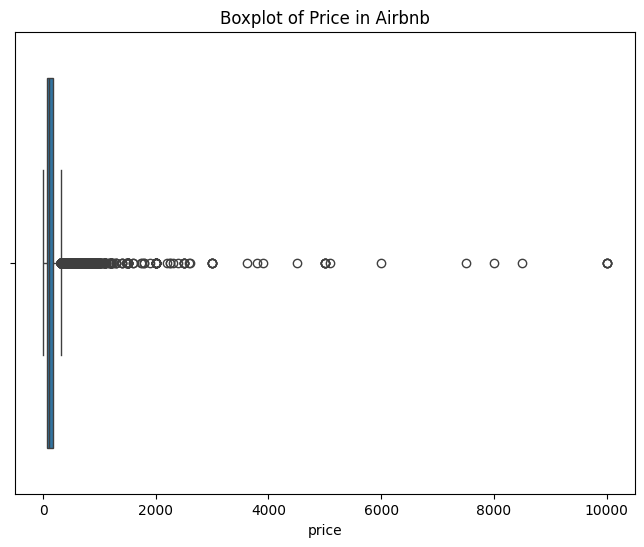

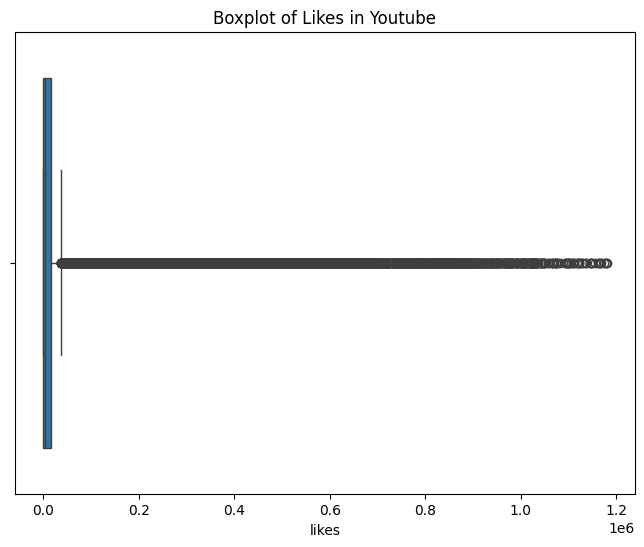

In [ ]:
#outlier detection
#viualize outliers for the price in the Airbnb using boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x=airbnb_data['price'])
plt.title("Boxplot of Price in Airbnb")
plt.show()

#remove outliers in Airbnb dataset
q1 = airbnb_data['price'].quantile(0.25)
q3 = airbnb_data['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#visualize outliers for likes in youtube dataset
plt.figure(figsize=(8,6))
sns.boxplot(x=youtube_data['likes'])
plt.title("Boxplot of Likes in Youtube")
plt.show()

#remove outliers in Youtube dataset
q1 = youtube_data['likes'].quantile(0.25)
q3 = youtube_data['likes'].quantile(0.75)
iqr = q3 - q1
youtube_data = youtube_data[(youtube_data['likes'] >= lower_bound) & (youtube_data['likes'] <= upper_bound)]

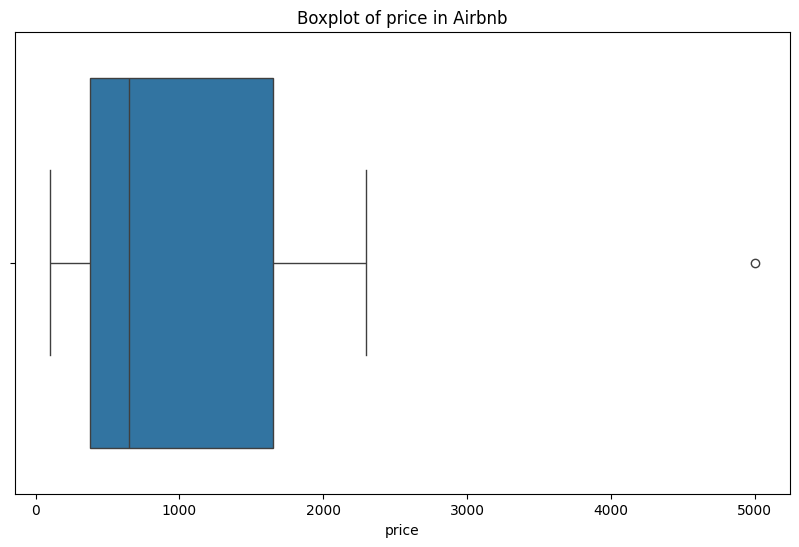

<ipython-input-39-c7f114e2e337>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster'] = kmeans.fit_predict(scaled_data)


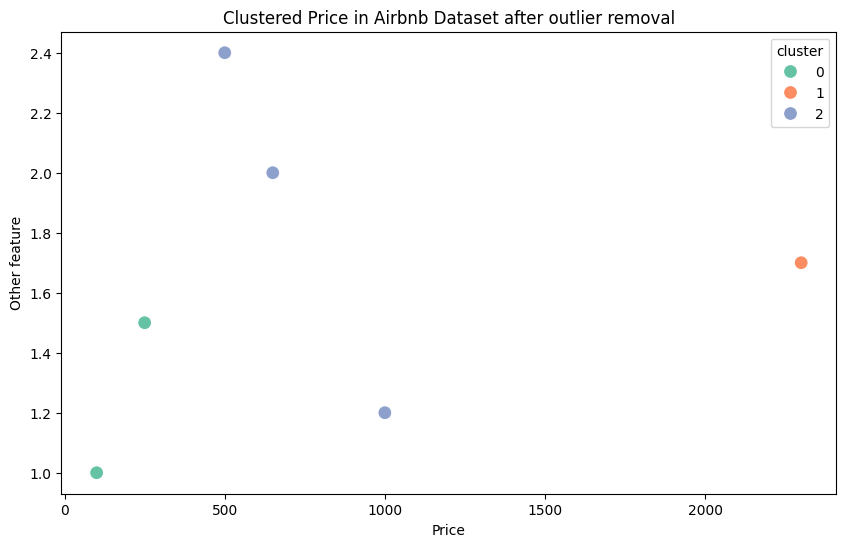

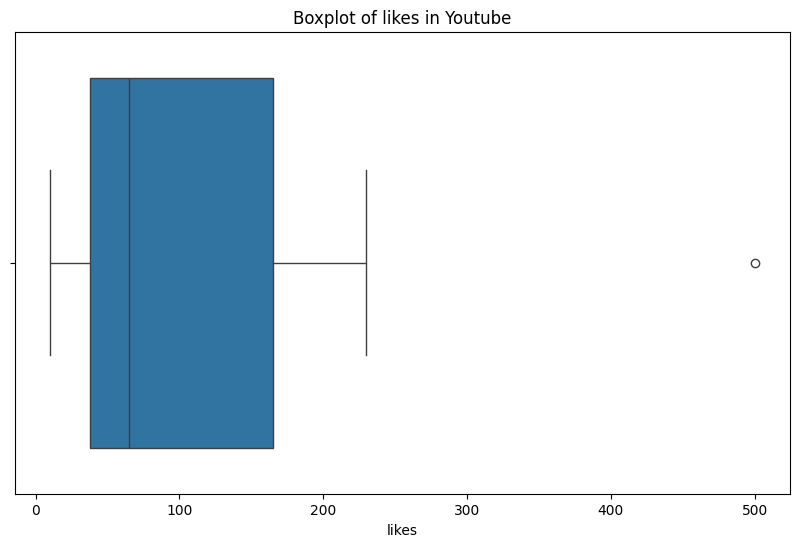

<ipython-input-39-c7f114e2e337>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster'] = kmeans.fit_predict(scaled_data)


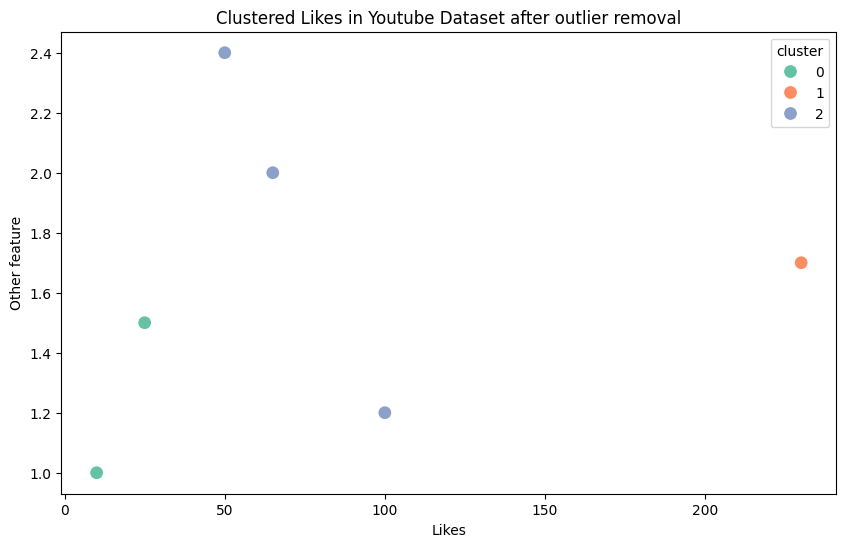

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#sample airbnb dataset
airbnb_data = pd.DataFrame({'price':[100,500,250,650,1000,2300,5000],
                            'other_feature':[1,2.4,1.5,2,1.2,1.7,2.3]})
#sample youtube dataset
youtube_data = pd.DataFrame({'likes':[10,50,25,65,100,230,500],
                             'other_feature':[1,2.4,1.5,2,1.2,1.7,2.3]})

#function to visualize and remove outliers using boxplot and K-Means clustering
def visualize_and_remove_outliers(df, feature, dataset_name):
  #visualzise outliers using boxplot
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[feature])
  plt.title(f"Boxplot of {feature} in {dataset_name}")
  plt.show()

  #calculate IQR and filter outliers
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  iqr = q3 - q1
  filtered_df = df[(df[feature]>=(q1-1.5*iqr))&(df[feature]<=(q3+1.5*iqr))]

  #perform k-means clustering
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(filtered_df[[feature]])
  kmeans = KMeans(n_clusters=3, random_state = 42)
  filtered_df['cluster'] = kmeans.fit_predict(scaled_data)

  #plot clustered data
  plt.figure(figsize=(10,6))
  sns.scatterplot(data=filtered_df,x=feature, y='other_feature', hue='cluster', palette='Set2', s=100)
  plt.title(f'Clustered {feature.capitalize()} in {dataset_name} Dataset after outlier removal')
  plt.xlabel(feature.capitalize())
  plt.ylabel('Other feature')
  plt.show()

  return filtered_df

#visualize and remove outliers in Airbnb dataset
airbnb_data = visualize_and_remove_outliers(airbnb_data, 'price', 'Airbnb')

#visualize and remove outliers in Youtube dataset
youtube_data = visualize_and_remove_outliers(youtube_data, 'likes', 'Youtube')



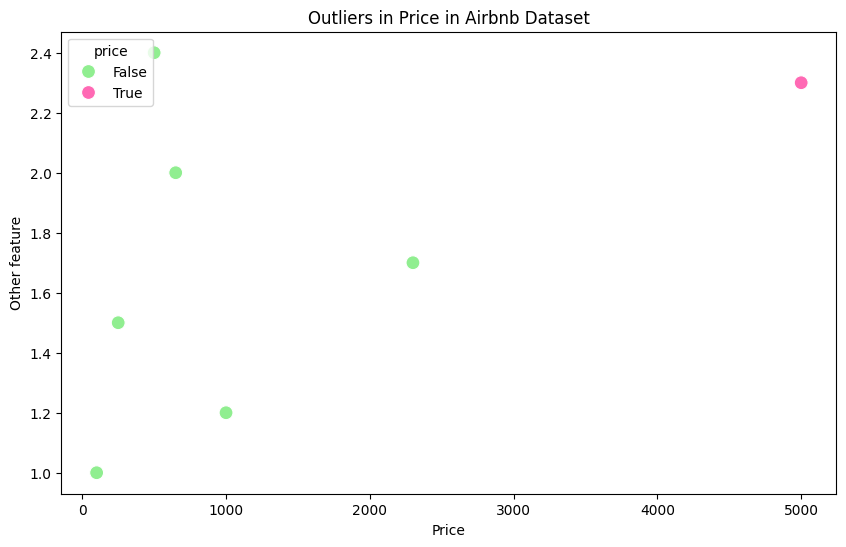

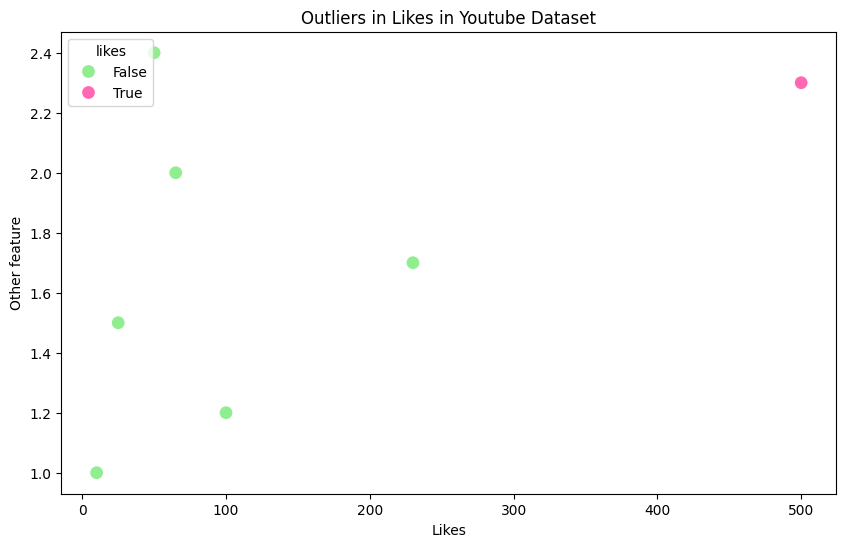

In [ ]:
#sample airbnb dataset
airbnb_data = pd.DataFrame({'price':[100,500,250,650,1000,2300,5000],
                            'other_feature':[1,2.4,1.5,2,1.2,1.7,2.3]})
#sample youtube dataset
youtube_data = pd.DataFrame({'likes':[10,50,25,65,100,230,500],
                             'other_feature':[1,2.4,1.5,2,1.2,1.7,2.3]})

#function to visualize outliers using scatterplot
def visualize_outlier_scatter(df, feature, dataset_name):
  #calculate iqr range to identify outliers
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  iqr = q3 - q1
  outlier_condition = (df[feature] < (q1 - 1.5 * iqr)) | (df[feature] > (q3 + 1.5 * iqr))

  #plot scatterplot with outliers
  plt.figure(figsize=(10,6))
  sns.scatterplot(data=df, x=feature, y='other_feature', hue=outlier_condition, palette = {True: 'Hotpink', False: 'Lightgreen'}, s=100)
  plt.title(f'Outliers in {feature.capitalize()} in {dataset_name} Dataset')
  plt.xlabel(feature.capitalize())
  plt.ylabel('Other feature')
  plt.show()

#visualize outliers for Airbnb dataset
visualize_outlier_scatter(airbnb_data, 'price', 'Airbnb')

#visualize outliers for Youtube dataset
visualize_outlier_scatter(youtube_data, 'likes', 'Youtube')